<a href="https://colab.research.google.com/github/dgeison/spark_trabalhando_com_classificacao/blob/main/Spark_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1 - Preparando os Dados**

## **1.1 Apresentação**

## **1.2 Preparando o Ambiente**

### PySpark

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

<font size=2>**Fonte:** [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)</font>

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### SparkSession

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

<font size=2>**Fonte:** [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)</font>

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master('local[*]').appName("Classificação com Spark").getOrCreate()
spark

## **1.3 Carregamento dos Dados**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dados = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/alura/spark - trabalhando com classificacao/dados/dados_clientes.csv', sep=',', header=True, inferSchema=True)

In [6]:
dados

DataFrame[id: int, Churn: string, Mais65anos: int, Conjuge: string, Dependentes: string, MesesDeContrato: int, TelefoneFixo: string, MaisDeUmaLinhaTelefonica: string, Internet: string, SegurancaOnline: string, BackupOnline: string, SeguroDispositivo: string, SuporteTecnico: string, TVaCabo: string, StreamingFilmes: string, TipoContrato: string, ContaCorreio: string, MetodoPagamento: string, MesesCobrados: double]

In [7]:
dados.show()

+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
| id|Churn|Mais65anos|Conjuge|Dependentes|MesesDeContrato|TelefoneFixo|MaisDeUmaLinhaTelefonica|   Internet|   SegurancaOnline|      BackupOnline| SeguroDispositivo|    SuporteTecnico|           TVaCabo|   StreamingFilmes|TipoContrato|ContaCorreio| MetodoPagamento|MesesCobrados|
+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
|  0|  Nao|         0|    Sim|        Nao|              1|         Nao|    SemServicoTelefonico|        DSL|               Nao|               Sim|              

In [8]:
dados.count()

10348

In [9]:
dados.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [10]:
dados\
    .select('Internet')\
    .groupBy('Internet')\
    .count()\
    .show()

+-----------+-----+
|   Internet|count|
+-----------+-----+
|FibraOptica| 5401|
|        Nao| 1741|
|        DSL| 3206|
+-----------+-----+



In [11]:
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



## **1.4 Transformando os Dados**

<font size=2>**Fonte:** [Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)</font>

In [12]:
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [13]:
from pyspark.sql import functions as f

In [14]:
# Quando nossa coluna for sim, troque por um... percorrer por um for. Alias, como percorre, pega a variável no C
todasColunas = [f.when(f.col(c)=='Sim', 1).otherwise(0).alias(c) for c in colunasBinarias]
for coluna in reversed(dados.columns):
  if coluna not in colunasBinarias:
    todasColunas.insert(0, coluna)
todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorr

In [15]:
dados.select(todasColunas).show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

In [16]:
dataset = dados.select(todasColunas)

In [17]:
dataset.show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

## **1.5 Criando *Dummies***

In [18]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- Internet: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)



In [19]:
dataset.select(['Internet', 'TipoContrato', 'MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

In [20]:
dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0).show()

+-----+------+----------------+-------------+-------------+
|   id|Boleto|BoletoEletronico|CartaoCredito|DebitoEmConta|
+-----+------+----------------+-------------+-------------+
| 3997|     0|               0|            1|            0|
| 7554|     0|               1|            0|            0|
| 6336|     0|               1|            0|            0|
| 6357|     0|               1|            0|            0|
| 9427|     0|               0|            1|            0|
| 2659|     0|               0|            1|            0|
|  471|     0|               1|            0|            0|
| 4935|     0|               0|            1|            0|
| 4818|     0|               0|            1|            0|
| 1342|     1|               0|            0|            0|
| 1959|     0|               1|            0|            0|
| 9376|     0|               0|            1|            0|
| 2366|     0|               1|            0|            0|
| 1580|     0|               0|         

In [21]:
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)

In [22]:
dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    ).drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    ).show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [23]:
dataset = dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    ).drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    )

In [24]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [25]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)
 |-- Internet_DSL: integer (nullable = true)
 |-- Internet_FibraOptica: integer (nullable = true)
 |-- Internet_Nao: integer (nullable = true)
 |-- TipoContrato_Mensalmente: integer (nullable = true)
 |-- TipoContrato_UmAno: integer (nullable = true)
 |-- TipoContr

# **Aula 2 - Regressão Logística**

## **2.1 O Modelo**


A regressão logística é um método popular para prever uma resposta categórica. É um caso especial de modelos Lineares Generalizados que prevê a probabilidade dos resultados. Em `spark.ml`, a regressão logística pode ser usada para prever um resultado binário usando regressão logística binomial ou pode ser usada para prever um resultado multiclasse usando regressão logística multinomial. Use o parâmetro `family` para selecionar entre esses dois algoritmos ou deixe-o indefinido e o Spark inferirá a variante correta.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression)</font>

 <img src="https://miro.medium.com/max/1400/0*1KnKYuv0UDu_1-qM.gif?width=1191&height=670" alt="Minha Figura">

## **2.2 Preparação dos Dados**

In [26]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [27]:
from pyspark.ml.feature import VectorAssembler

In [28]:
dataset = dataset.withColumnRenamed('Churn', 'label')

In [29]:
X = dataset.columns
X.remove('label')
X.remove('id')
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [30]:
assembler = VectorAssembler(inputCols=X, outputCol='features')

In [31]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [32]:
dataset_prep.show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                   |label|
+-----------------------------------------------------------------------------------------------------------+-----+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])                               |1    |
|(24,[1,2,3,5,6,8,9,11,12,13,15,17,22],[60.0,103.6142230120257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1    |
|(24,[1,2,5,6,10,11,12,13,14,18,23],[12.0,75.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                       |0    |
|(24,[1,2,3,5,8,12,13,14,19,21],[69.0,61.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                               |0    |
|(24,[1,2,3,5,6,11,13,15,17,22],[7.0,86.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                 |1    |
|(24,[1,2,5,6,12,13,15,17,22],[14.0,85.03742670311915,1.0,1.0,1.0,1.0,1.

## **2.3 Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font> |
<font size=2>[LogisticRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegression.html)</font>

In [33]:
SEED= 101

In [34]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=SEED)

In [35]:
treino.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    1|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    1|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    1|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
+--------------------+-----+
only showing top 20 rows



In [36]:
treino.count()

7206

In [37]:
teste.count()

3142

In [38]:
from pyspark.ml.classification import LogisticRegression

In [39]:
lr = LogisticRegression()

In [40]:
modelo_lr = lr.fit(treino)

In [41]:
previsoes_lr_teste = modelo_lr.transform(teste)

In [42]:
previsoes_lr_teste.show(truncate=False)

+------------------------------------------------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|features                                                                                              |label|rawPrediction                             |probability                              |prediction|
+------------------------------------------------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,9,10,11,14,18,22],[1.0,55.0,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[3.0217417975155163,-3.0217417975155163]  |[0.9535467400028285,0.04645325999717154] |0.0       |
|(24,[0,1,2,3,4,5,6,7,13,15,17,22],[1.0,24.0,79.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])               |0    |[-0.09221929660763595,0.09221929660763595]|[0.4769615009160580

## **2.4 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[LogisticRegressionTrainingSummary](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegressionTrainingSummary.html)</font>

In [43]:
resumo_lr_treino = modelo_lr.summary

In [44]:
resumo_lr_treino.accuracy

0.7849014709963918

In [45]:
print("Acurácia: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurácia: 0.784901
Precisão: 0.770686
Recall: 0.812517
F1: 0.791049


In [46]:
previsoes_lr_teste.select('label', 'prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       1.0|
|    1|       0.0|
|    1|       0.0|
|    0|       1.0|
|    0|       1.0|
|    0|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 20 rows



In [47]:
previsoes_lr_teste.select('label', 'prediction').where((f.col('label')==1) & (f.col('prediction') ==1)).count()

1256

In [48]:
tp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
tn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
fp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
fn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
# True positive, True Negative, False Positive, False Negative
print(tp, tn,fp, fn)

1256 1179 400 307


In [49]:
from utils import calcula_mostra_metricas

In [50]:
print(calcula_mostra_metricas(modelo_lr, previsoes_lr_teste, normalize=True))

                    Previsto
               Churn     Não-Churn
    Churn      80       19
Real
    Não-Churn  25       74

Acurácia: 0.7849014709963918
Precisão: 0.7706855791962175
Recall: 0.8125173082248685
F1: 0.7910488002156916



# **Aula 3 - Árvore de Decisão - Classificação**

## **3.1 O Modelo**


As árvores de decisão são métodos populares para tarefas de *machine learning* de classificação e regressão. As árvores de decisão são amplamente utilizadas por serem fáceis de interpretar, lidar com *features* categóricas e contínuas, podem ser aplicadas a problemas de classificação com múltiplas classes e não requerem padronização dos dados. Algoritmos de conjunto de árvores, como *Random Forest* e *Boosting*, estão entre os de melhor desempenho para tarefas de classificação e regressão.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier)
| [Decision trees](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-trees)</font>

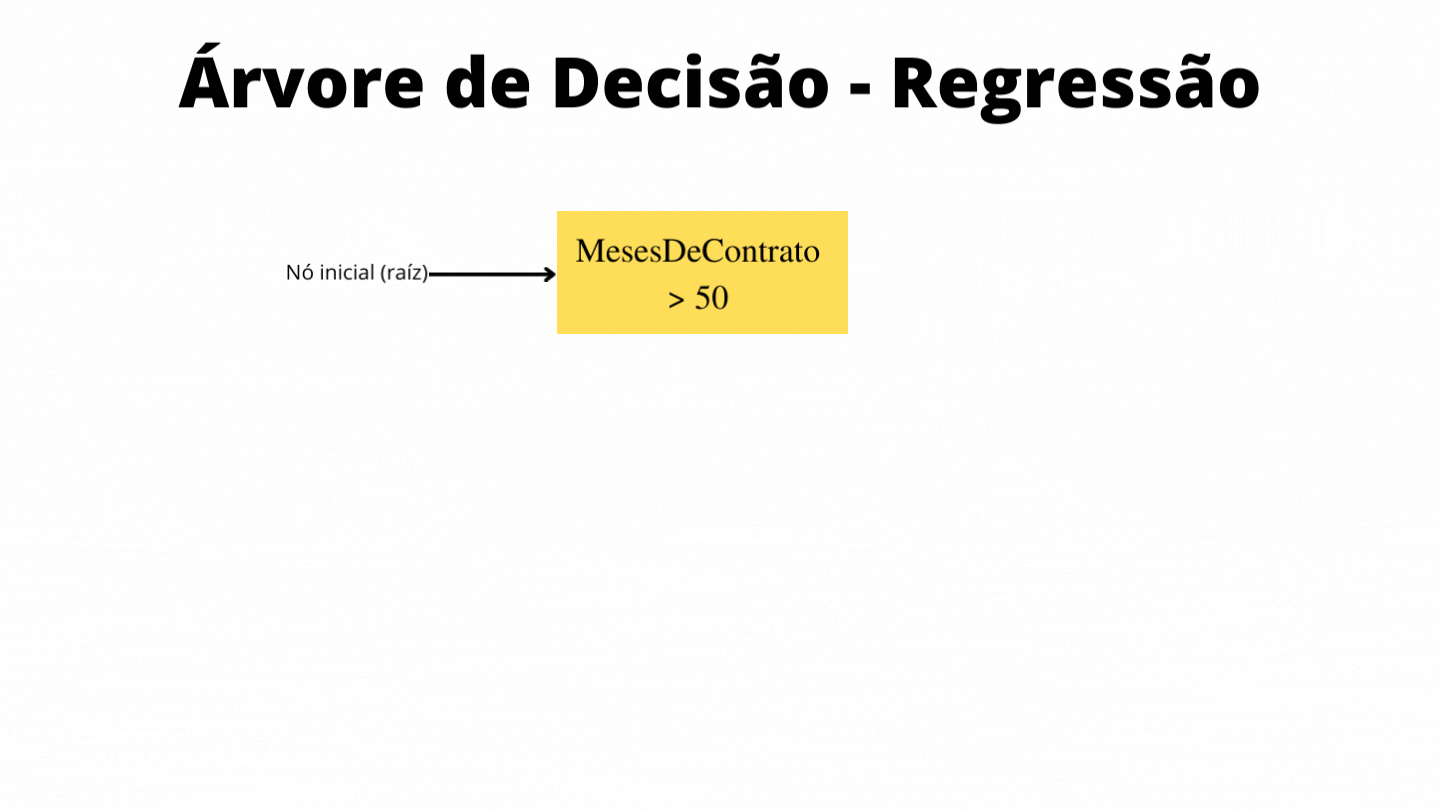

## **3.2 Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html)</font>

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier(seed=SEED)

In [53]:
modelo_dtc = dtc.fit(treino)

In [54]:
previsoes_dtc_treino = modelo_dtc.transform(treino)

In [55]:
previsoes_dtc_treino.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,

## **3.3 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[MulticlassClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html)</font>

In [56]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [57]:
evaluator = MulticlassClassificationEvaluator()

In [58]:
evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: 'accuracy'})

0.7917013599777962

In [59]:
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664


In [60]:
previsoes_dtc_teste = modelo_dtc.transform(teste)

In [61]:
previsoes_dtc_teste.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [62.0,128.0]|[0.32631578947368...|       1.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [51.0,141.0]| [0.265625,0.734375]|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [63.0,118.0]|[0.34806629834254...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,

In [62]:
evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: 'accuracy'})

0.7714831317632082

In [63]:
from utils import calcula_mostra_metricas_evaluate

print(calcula_mostra_metricas_evaluate(previsoes_lr_teste, normalize=False))

                    Previsto
               Churn     Não-Churn
    Churn      1256       307
Real
    Não-Churn  400       1179

Acurácia: 0.7749840865690643
Precisão: 0.7584541062801933
Recall: 0.8035828534868842
F1: 0.7803665734700218

